<a href="https://colab.research.google.com/github/shakeythyaa-19/HR-Talent-Analytics/blob/main/Copy_of_Talent_Analytics_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd

df = pd.read_csv("/content/HR-Employee-Attrition.csv")


# Remove null values
df_cleaned = df.dropna()

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Display the cleaned DataFrame
print("\nDataFrame after removing null values and duplicates:")
print(df_cleaned)



DataFrame after removing null values and duplicates:
      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHom

In [ ]:
import pandas as pd
df = pd.read_csv('/content/HR-Employee-Attrition.csv')
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
print(df['Attrition'])
result_department = df.groupby('Department')['Attrition'].mean()
result_gender = df.groupby('Gender')['Attrition'].mean()
print("Mean Attrition by Department:")
print(result_department)

print("\nMean Attrition by Gender:")
print(result_gender)


percentage_attrition = len(df[df['Attrition'] == 1]) / len(df) * 100
print(f"\nPercentage of Attrition: {percentage_attrition:.2f}%")


0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64
Mean Attrition by Department:
Department
Human Resources           0.190476
Research & Development    0.138398
Sales                     0.206278
Name: Attrition, dtype: float64

Mean Attrition by Gender:
Gender
Female    0.147959
Male      0.170068
Name: Attrition, dtype: float64

Percentage of Attrition: 16.12%


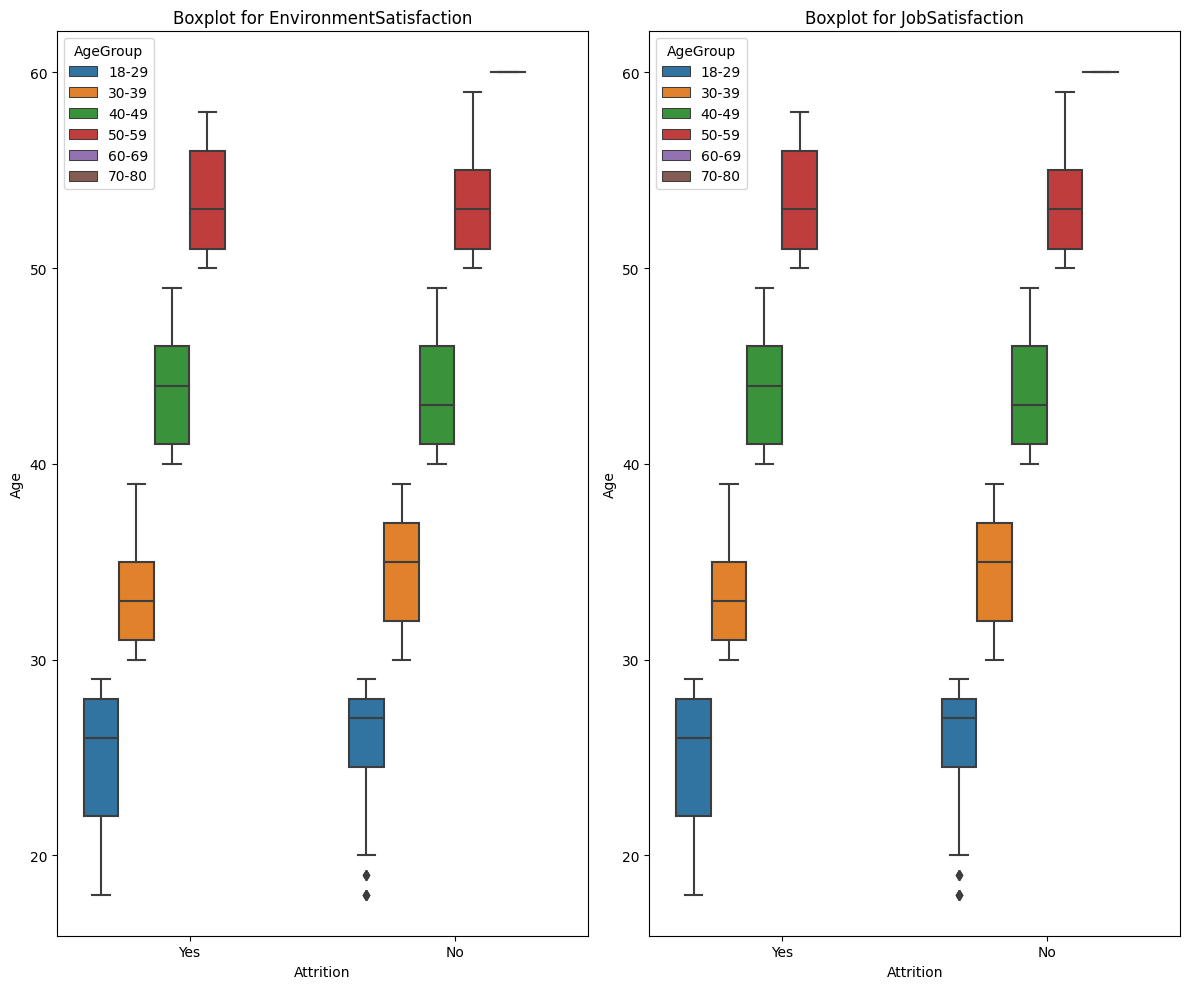

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/HR-Employee-Attrition.csv")


age_bins = [18, 30, 40, 50, 60, 70, 80]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-80']


df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
categorical_values = ['EnvironmentSatisfaction', 'JobSatisfaction']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
for i, var in enumerate(categorical_values):
    sns.boxplot(x='Attrition', y='Age', hue='AgeGroup', data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot for {var}')

plt.tight_layout()
plt.show()


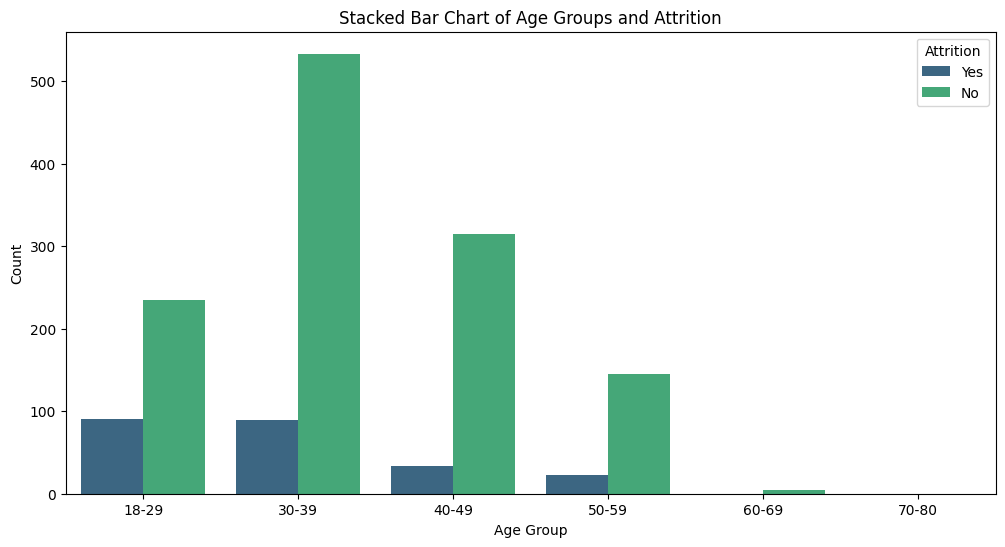

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/HR-Employee-Attrition.csv")


age_bins = [18, 30, 40, 50, 60, 70, 80]
age_labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70-80']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
plt.figure(figsize=(12, 6))
sns.countplot(x='AgeGroup', hue='Attrition', data=df, palette='viridis')
plt.title('Stacked Bar Chart of Age Groups and Attrition')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()


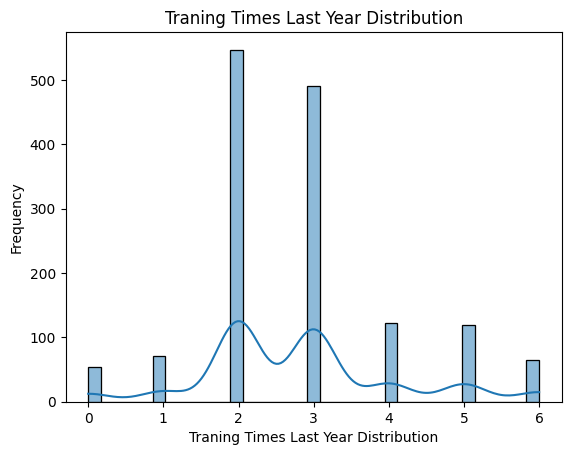

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('/content/HR-Employee-Attrition.csv')
sns.histplot(df['TrainingTimesLastYear'],kde=True)
plt.xlabel('Traning Times Last Year Distribution')
plt.ylabel('Frequency')
plt.title('Traning Times Last Year Distribution')
plt.show()

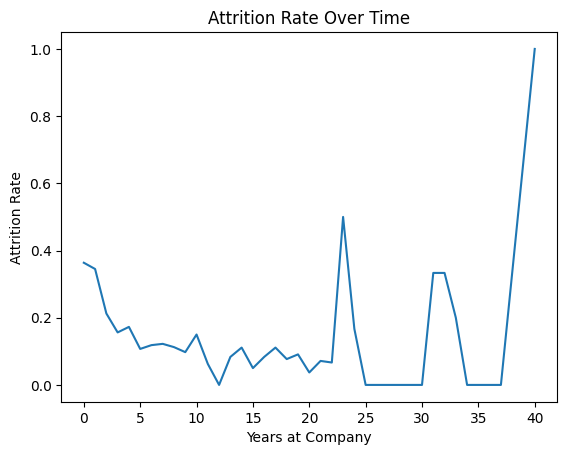

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/HR-Employee-Attrition.csv')
df['Attrition_binary'] = df['Attrition'].map({'Yes': 1, 'No': 0})
attrition_data = df.groupby('YearsAtCompany')['Attrition_binary'].mean().reset_index()
sns.lineplot(x='YearsAtCompany', y='Attrition_binary', data=attrition_data)
plt.xlabel('Years at Company')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate Over Time')
plt.show()


Mean Squared Error: 0.13239068774206364


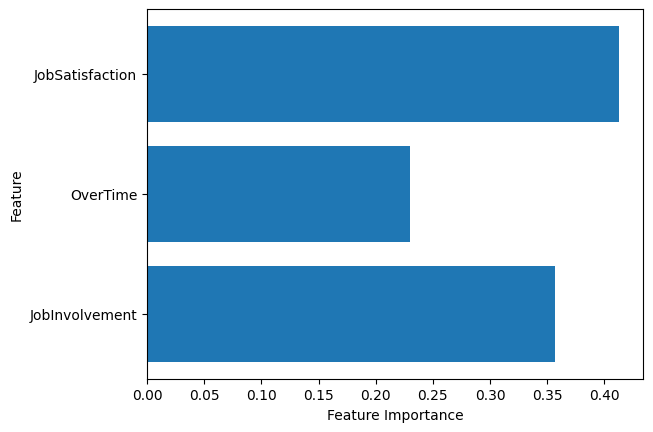

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
data = pd.read_csv('/content/HR_Analytics.csv')
data['OverTime'] = data['OverTime'].map({'Yes': 1, 'No': 0})
data = data[['JobInvolvement', 'JobSatisfaction','OverTime', 'PerformanceRating']]
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
data = pd.get_dummies(data, columns=categorical_cols)
X = data[['JobInvolvement','OverTime', 'JobSatisfaction']]
y = data['PerformanceRating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
feature_importances = model.feature_importances_
plt.barh(X.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


Accuracy: 0.847972972972973
Confusion Matrix:
[[247   2]
 [ 43   4]]
                Feature  Importance
9            OverTime_1    0.194536
8            OverTime_0    0.163492
0      JobInvolvement_1    0.100708
4     JobSatisfaction_1    0.083010
7     JobSatisfaction_4    0.073143
1      JobInvolvement_2    0.066382
2      JobInvolvement_3    0.060436
10  PerformanceRating_3    0.054441
11  PerformanceRating_4    0.053761
6     JobSatisfaction_3    0.052849
5     JobSatisfaction_2    0.050310
3      JobInvolvement_4    0.046932


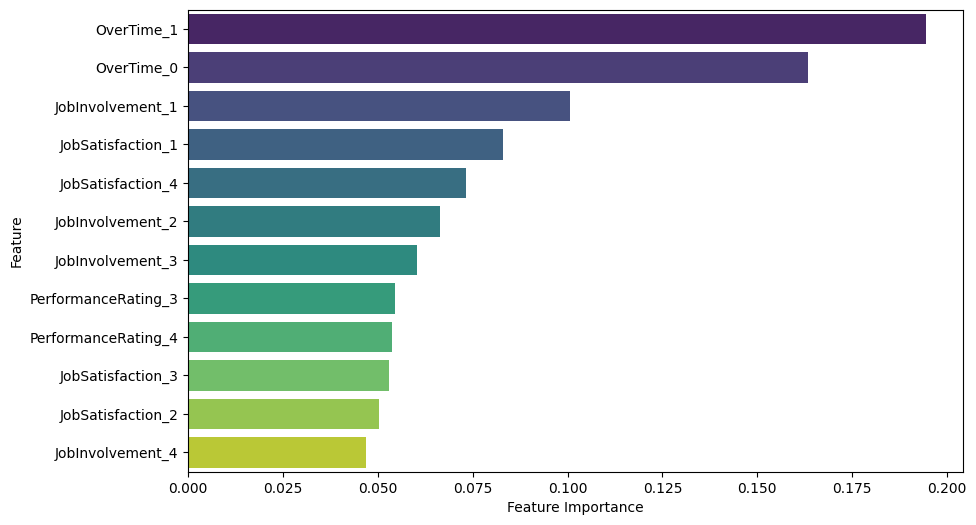

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
data = pd.read_csv('/content/HR_Analytics.csv')
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})
data['OverTime'] = data['OverTime'].map({'Yes': 1, 'No': 0})
selected_columns = ['JobInvolvement', 'JobSatisfaction', 'OverTime','PerformanceRating', 'Attrition']
data = data[selected_columns]
categorical_cols = ['JobInvolvement', 'JobSatisfaction','OverTime', 'PerformanceRating']
data = pd.get_dummies(data, columns=categorical_cols)
X = data.drop('Attrition', axis=1)
y = data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
feature_importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
print(feature_importance_df.sort_values('Importance', ascending=False)
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()



In [ ]:
print(data.columns)

Index(['Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount',
       ...
       'EmpID_RM990', 'EmpID_RM991', 'EmpID_RM992', 'EmpID_RM993',
       'EmpID_RM994', 'EmpID_RM995', 'EmpID_RM996', 'EmpID_RM997',
       'EmpID_RM998', 'EmpID_RM999'],
      dtype='object', length=1507)


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as pt
data = pd.read_csv('/content/HR_Analytics.csv')
selected_columns = ['Age', 'Department', 'Education', 'EnvironmentSatisfaction','JobInvolvement', 'OverTime']
categorical_cols = ['Department', 'Age']
X = data[selected_columns[:-1]]
y = data['Attrition']
X = pd.get_dummies(X, columns=categorical_cols)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
def predict_attrition(employee_id, model, data, X_columns):
    if employee_id not in data['EmpID'].values:
        return "Employee ID not found in the dataset."

    employee_data = data[data['EmpID'] == employee_id]
    employee_data = pd.get_dummies(employee_data[selected_columns[:-1]], columns=categorical_cols)

    for col in X_columns:
        if col not in employee_data.columns:
            employee_data[col] = 0

    employee_data = employee_data.reindex(columns=X_columns).fillna(0)
    prediction = model.predict(employee_data)
    probability = model.predict_proba(employee_data)[0][1]
    return f"Attrition Prediction: {prediction[0]}\nProbability of Attrition: {probability:.2f}"
employee_id = input("Enter User Id:")
print(predict_attrition(employee_id, model, data, X.columns))


Enter User Id:RM302
Attrition Prediction: No
Probability of Attrition: 0.15


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as pt
data = pd.read_csv('/content/HR_Analytics.csv')
selected_columns = ['Age', 'Department', 'Education', 'EnvironmentSatisfaction','JobInvolvement', 'OverTime']
categorical_cols = ['Department', 'Age']
X = data[selected_columns[:-1]]
y = data['Attrition']
X = pd.get_dummies(X, columns=categorical_cols)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
def predict_attrition(employee_id, model, data, X_columns):
    if employee_id not in data['EmpID'].values:
        return "Employee ID not found in the dataset."

    employee_data = data[data['EmpID'] == employee_id]
    employee_data = pd.get_dummies(employee_data[selected_columns[:-1]], columns=categorical_cols)

    for col in X_columns:
        if col not in employee_data.columns:
            employee_data[col] = 0

    employee_data = employee_data.reindex(columns=X_columns).fillna(0)
    prediction = model.predict(employee_data)
    probability = model.predict_proba(employee_data)[0][1]
    return f"Attrition Prediction: {prediction[0]}\nProbability of Attrition: {probability:.2f}"
employee_id = input("Enter User Id:")
print(predict_attrition(employee_id, model, data, X.columns))


Enter User Id:RM458
Attrition Prediction: Yes
Probability of Attrition: 0.82
